In [10]:
import plotly.express as px
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from interp_utils import TensorHistogramObserver


## Per-layer change to loss when GeLUs are swapped for ReLUs


In [16]:
# Changes to loss when GELUs are swapped with ReLUs (per layer)
# (Label smoothing loss has same smoothing parameter as ConvNext during training)

data = torch.load('gelu_to_relu_results.pt')

ce_losses = data['ce_losses_by_relud_layer']
ce_loss = data['normal_ce_loss']

ls_losses = data['ls_losses_by_relud_layer']
ls_loss = data['normal_ls_loss']

fig = px.scatter(y=ce_losses - ce_loss, title="Cross Entropy Loss change")
fig.update_layout(xaxis_title="Layer", yaxis_title="Loss change after swapping gelus with relus")
fig.show()

fig = px.scatter(y=ls_losses - ls_loss, title="Label Smoothing Loss change")
fig.update_layout(xaxis_title="Layer", yaxis_title="Loss change after swapping gelus with relus")
fig.show()

## Show neuron preactivation histograms

In [13]:

# Load existing data
hist_observer = TensorHistogramObserver(min=-10, max=4, bin_width=0.2, tensor_shape=(18, 1536))
neuron_bin_counts = torch.load('neuron_bin_counts.pt')
hist_observer.counts = neuron_bin_counts

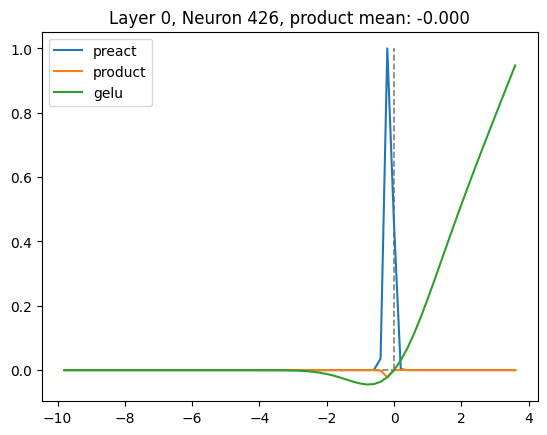

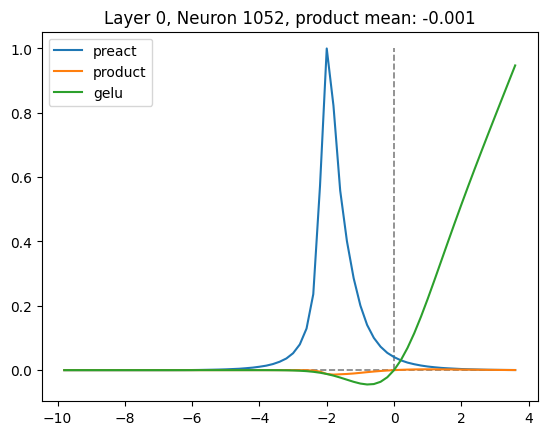

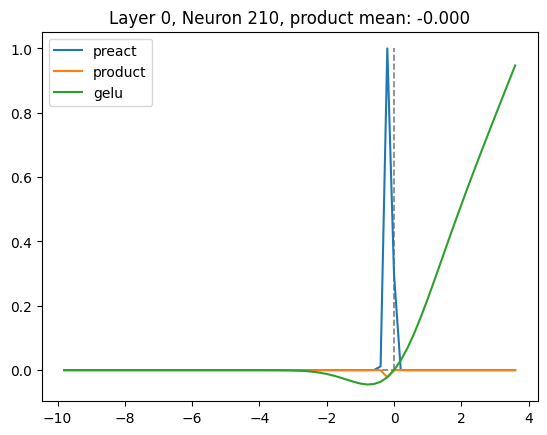

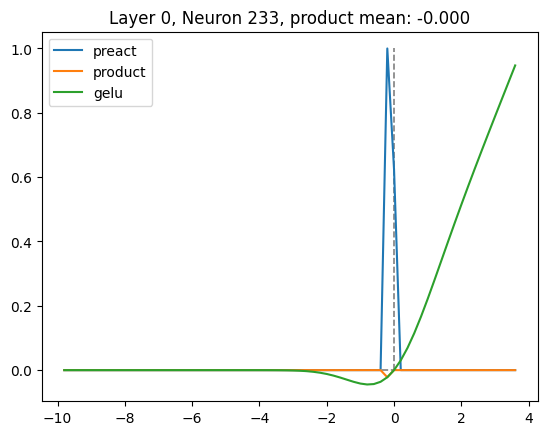

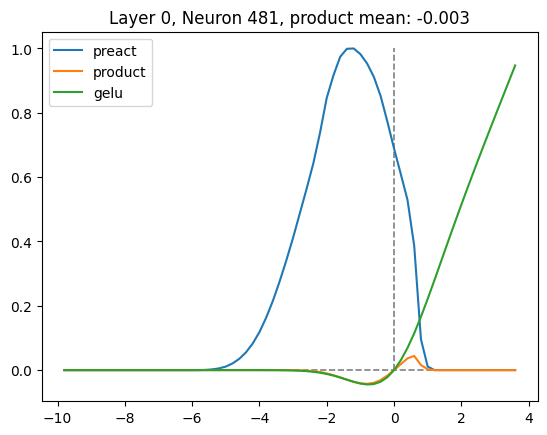

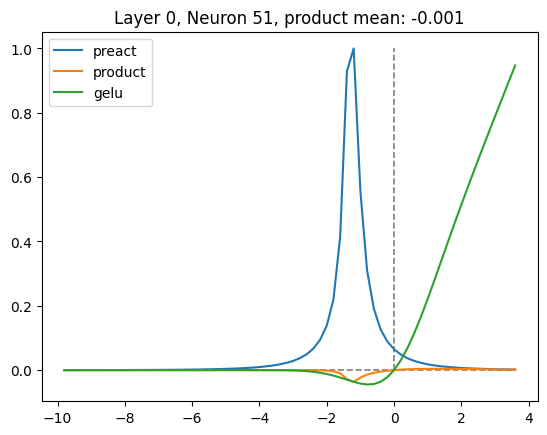

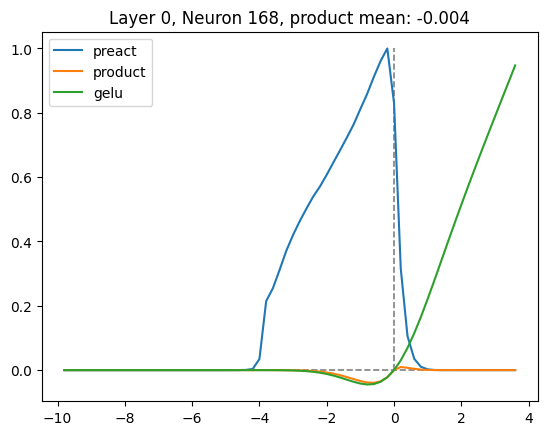

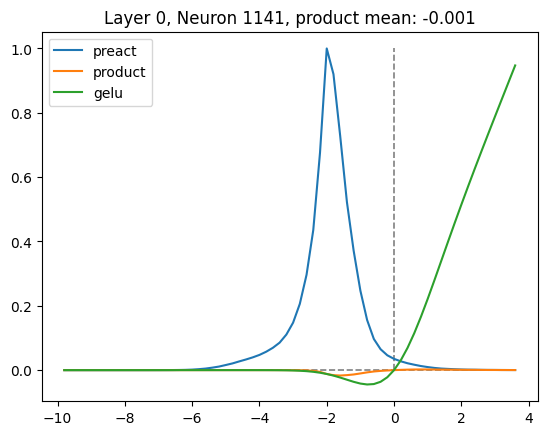

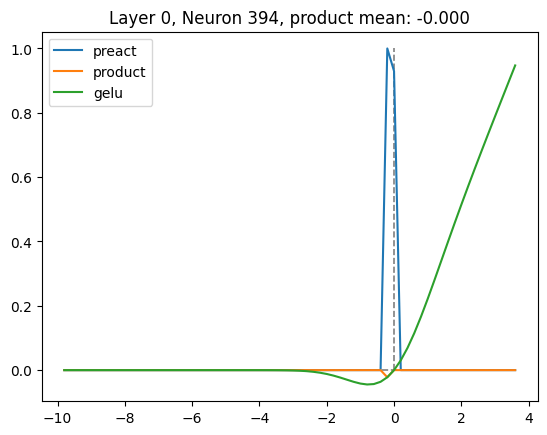

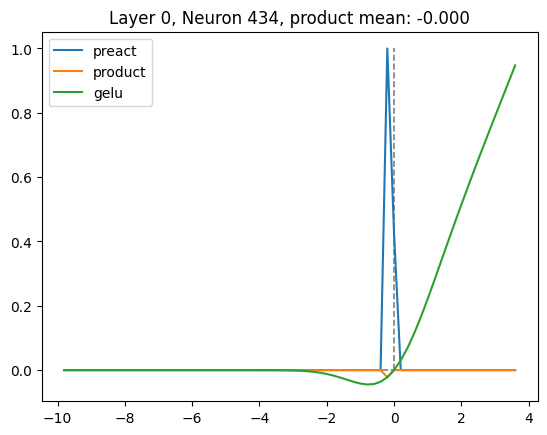

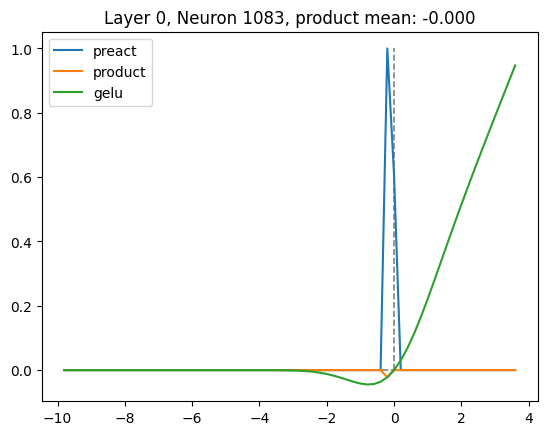

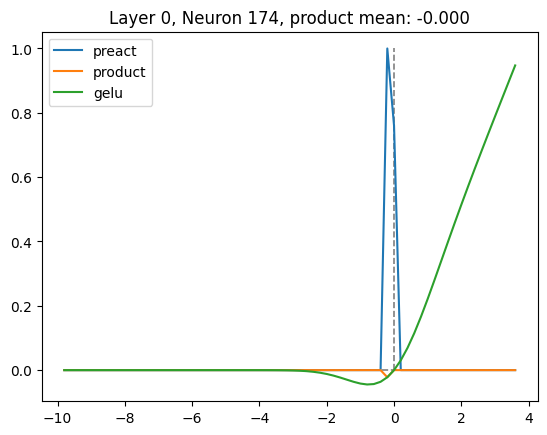

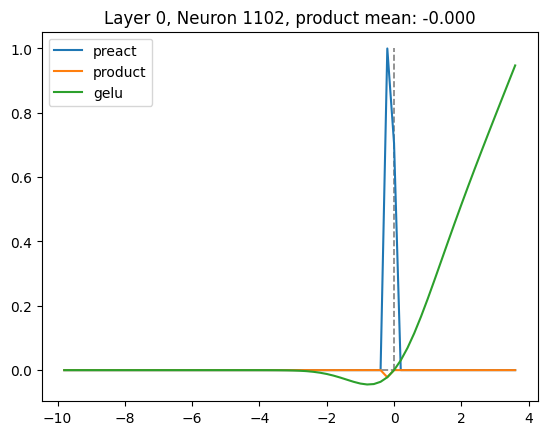

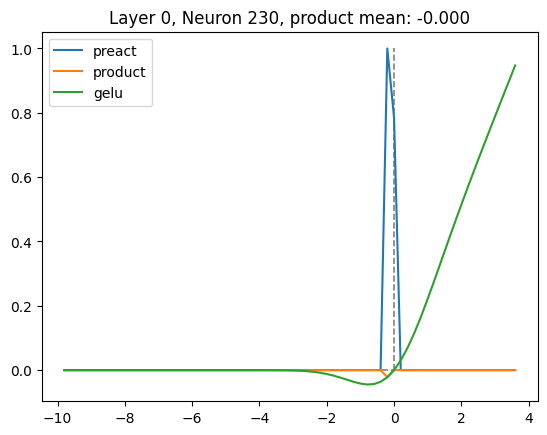

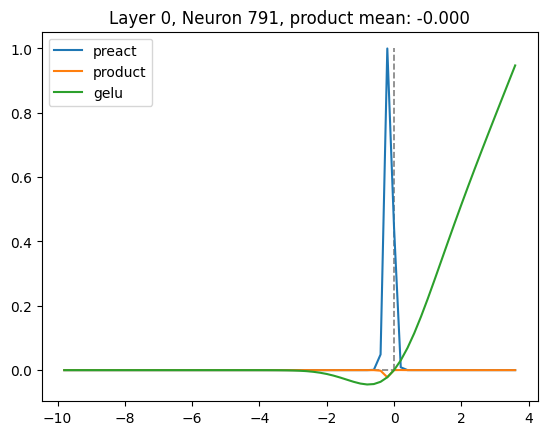

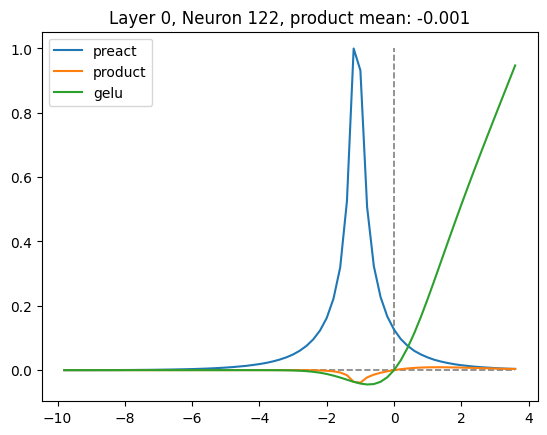

In [14]:
LAYER = 0
CLIP_EDGES = True

# Render 16 random neurons from the layer
for neuron_idx in torch.randint(0, 1536, (16,)):
    boundaries = hist_observer.boundaries

    hist_counts = hist_observer.counts[LAYER][neuron_idx]
    hist_counts = (hist_counts / hist_counts.max())
    boundaries = boundaries[0:-1]

    gelu_y = F.gelu(boundaries)
    gelu_y = (gelu_y / gelu_y.max())

    if CLIP_EDGES is True:
        boundaries = boundaries[1:-1]
        hist_counts = hist_counts[1:-1]
        gelu_y = gelu_y[1:-1]

    hist_counts = hist_counts / hist_counts.max()

    product = gelu_y*hist_counts

    # zero line and y axis
    plt.plot([boundaries[0], boundaries[-1]], [0, 0], color="grey", linestyle="--", label="_zero", linewidth=1.2)
    plt.plot([0, 0], [0, 1], color="grey", linestyle="--", label="_yaxis", linewidth=1.2)

    plt.plot(boundaries, hist_counts, label="preact")
    plt.plot(boundaries, product, label="product")
    plt.plot(boundaries, gelu_y, label="gelu")
     
    # add title
    plt.title(f"Layer {LAYER}, Neuron {neuron_idx}")

    plt.legend()
    plt.show()